In [1292]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from pandas_profiling import ProfileReport

In [1293]:
genres = pd.read_csv('tmdb_genres.csv')
genres.head()

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [1294]:
movies = pd.read_csv("tmdb_movies.csv")
movies.head()


,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0


In [1295]:
#1 Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.
Q3 = movies['vote_count'].quantile(0.75)
data=movies[(movies['vote_count'] > Q3)]
data1=data.nlargest(10, ['vote_average'])
data_list=data1['original_title']
movie_list=data_list.values.tolist()
movie_list

['The Shawshank Redemption',
 'The Godfather',
 'Fight Club',
 "Schindler's List",
 '千と千尋の神隠し',
 'The Godfather: Part II',
 'Pulp Fiction',
 'Whiplash',
 'The Dark Knight',
 'The Green Mile']

In [1296]:
#2 Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). #
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_date']
data2=movies[(movies['release_date'] >= '01-01-2010') & (movies['release_date'] <= '01-01-2016')]
data2['release_date']=data2['release_date'].dt.year.round(0)
data3=data2.groupby('release_date').mean()
data4=data3[['budget','revenue']]
data4


C:\Users\pawit\AppData\Local\Temp\ipykernel_13168\2090057935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['release_date']=data2['release_date'].dt.year.round(0)


,budget,revenue
release_date,,
2010,3.449541e+07,9.043811e+07
2011,3.477232e+07,9.200413e+07
2012,3.492203e+07,1.160659e+08
2013,3.552329e+07,1.013485e+08
2014,3.095989e+07,1.013466e+08
2015,3.113216e+07,1.054399e+08
2016,2.500000e+07,1.397284e+06


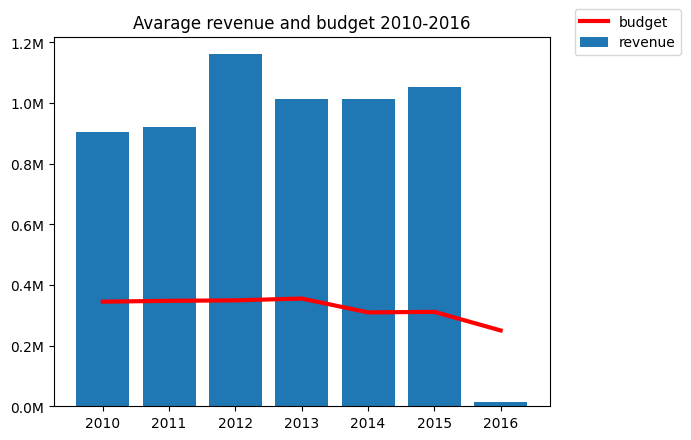

<Figure size 640x480 with 0 Axes>

In [1297]:
# Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. 
# Sformatuj odpowiednio oś X oraz oś Y.
#  Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.
from turtle import width

from pyparsing import line
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
fig, axes = plt.subplots()
def million(x, pos):
        return '{:2.1f}M'.format(x*1e-8)
formatter = plt.FuncFormatter(million)
axes.yaxis.set_major_formatter(formatter)
#oś x wydaje mi się odpowiednio sformatowana to nie ruszałem
axes.bar(year, data4['revenue'], label='revenue')
axes.plot(year, data4['budget'],color='red',linewidth=3, label='budget')
axes.legend(loc=(1.05,0.95))
plt.title('Avarage revenue and budget 2010-2016')

fig = plt.figure()




In [1298]:
# 3Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.
genres_dict=dict(zip(genres['Unnamed: 0'].unique(),genres['genres']))
movies['genre']=movies['genre_id'].map(genres_dict)
movies

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genre
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0,Action
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0,Comedy
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0,Comedy
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,NaN


In [1299]:
#Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?
movies['genre'].value_counts().idxmax()

'Drama'

In [1300]:
(movies.genre.values == movies['genre'].value_counts().idxmax()).sum()

1207

In [1301]:
#Filmy, którego gatunku trwają średnio najdłużej (runtime)?
runtime=movies.groupby('genre').mean()
runtime['runtime'].idxmax()


'History'

<AxesSubplot:>

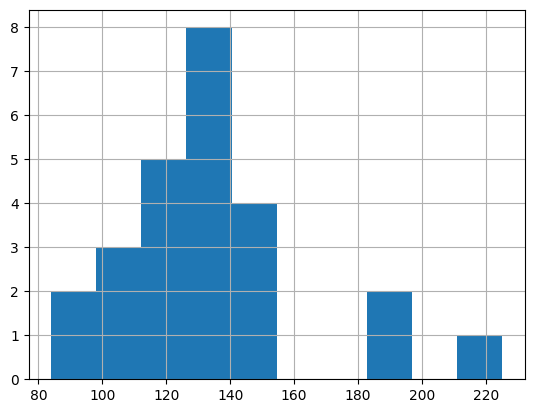

In [1302]:

#Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania
#(movies.genre.values == ['History'])
history=movies.loc[movies['genre'] == 'History']
history['runtime'].hist(bins=10)